# 泰坦尼克号-EDA

* Numpy-科学计算

* Pandas-数据分析处理

* Matplotlib-可视化

* Seaborn-可视化

* Scikit-Learn-机器学习

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #指定画图风格
import warnings
warnings.filterwarnings('ignore')  #过滤警告
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 查看每一列中缺失值的总数

In [3]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

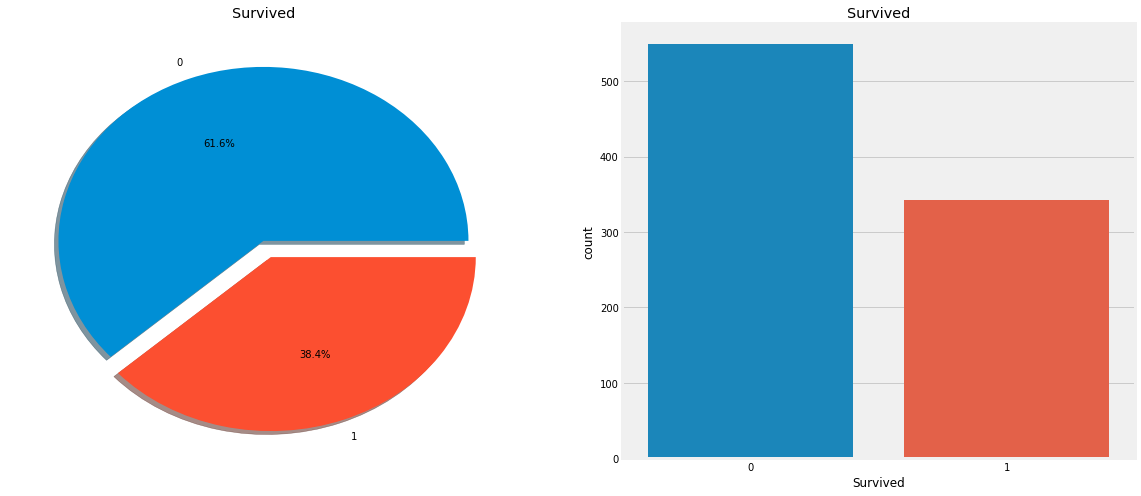

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
#data['Survived'].value_counts()是一个Series结构，直接跟.plot.pie()画出pie图
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) #explode指定间隔
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1]) #画出关于Survived列的统计条形图
ax[1].set_title('Survived')
plt.show()

## 数据特征分为：连续值和离散值
* 离散值：性别（男，女） 登船地点（S,Q,C）

* 连续值：年龄，船票价格

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()  #.count()计数

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

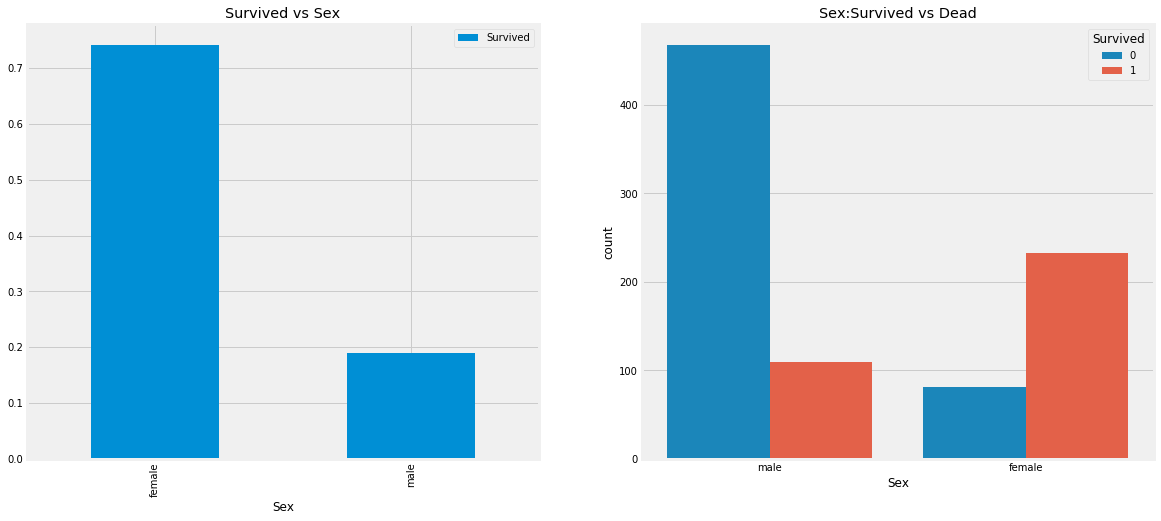

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# data[['Sex','Survived']].groupby(['Sex']).mean()是一个Series结构，结果是男女的获救比例
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1]) #在性别分开的情况下再对是否获救进行二次条形统计
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### 统计不同船舱中获救人数的情况
* pd.crosstab()

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

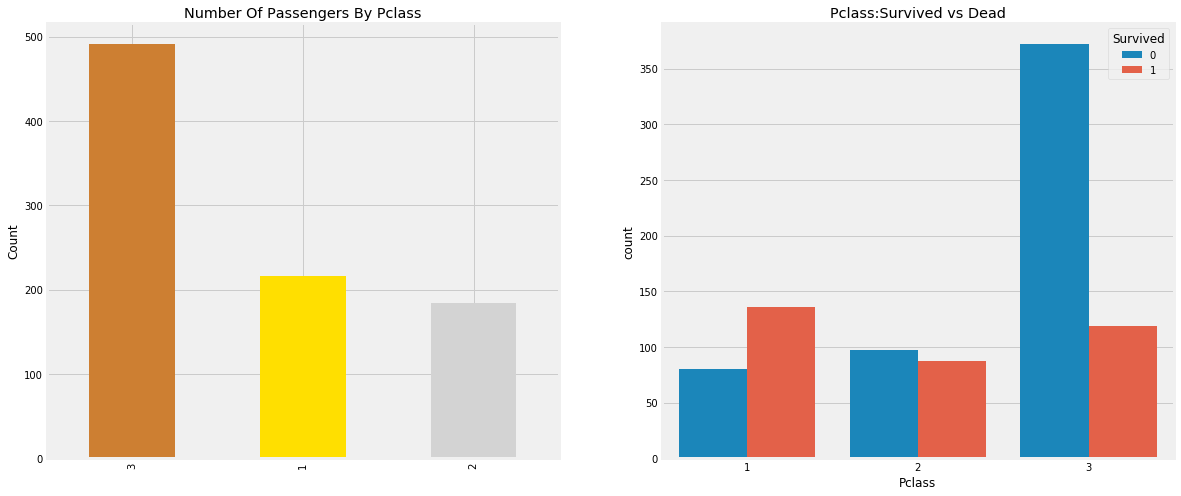

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### 评论：人们说金钱不能买到一切。但我们可以清楚地看到，船舱等级为1的被给予很高的优先级而救援。尽管数量在pClass 3乘客高了很多，仍然存活数从他们是非常低的，大约25%。

#### 对于pClass1来说存活是63%左右，而pclass2大约是48%。所以金钱和地位很重要。这样一个物欲横流的世界。

#### 那这些又和性别有关吗？继续观测船舱等级和性别对结果的影响

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
# margins=True定义了是否显示All这一行和列

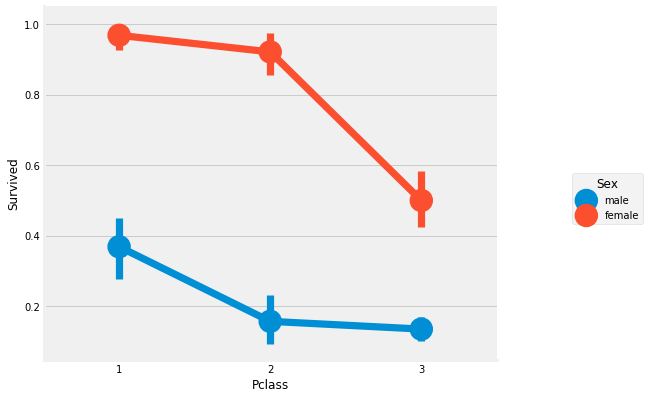

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### 上图可以看出，不论pClass，女性优先考虑。此外Pclass也是一个重要的特征。接下来分析其他特征

#### Age--> 连续值特征对结果的影响

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


### 展示船舱等级与年龄分布的关系，以Survived作为hue
### &
### 展示性别等级与年龄分布的关系，以Survived作为hue

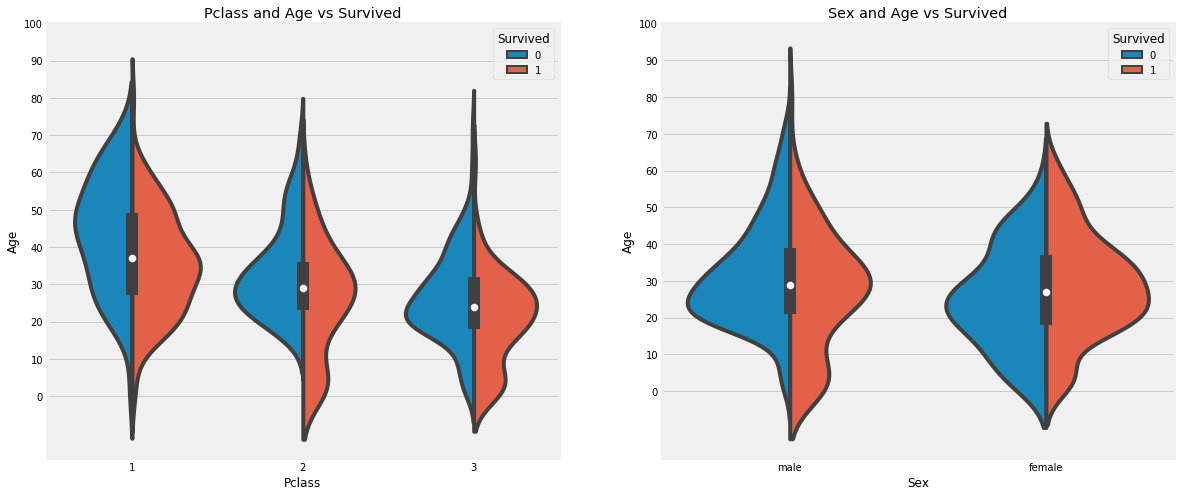

In [13]:
#对于小提琴图来说，横轴为离散，纵轴为连续
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

结果：
1）10岁以下儿童的存活率随Pclass增加。
2）20-50岁获救几率更高一些。

### 缺失值处理（填充）

* 平均值
* 经验值 
* 回归模型预测
* 剔除掉

正如前面看到的，年龄特征有177个空值。为了替换这些缺失值，可以给它们分配数据集的平均年龄。但问题是，有许多不同年龄的人。最好的办法是找到一个合适的年龄段！

可以检查名字特征。根据这个特征，名字有像先生或夫人这样的称呼，这样就可以把先生和夫人的平均值分配给各自的组。

### 使用正则表达式：[A-Za-z] +）来提取信息
* DataFrame.列名.str.extract(正则表达式内容)

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex
#数字显示的是每一类的人数

#### 将一些较杂的称呼如'Mlle','Mme','Ms'统一替换成Miss或Mr或Mrs或Other

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### 开始填充Age的缺失值

In [18]:
## 使用每组的均值来进行填充
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #看看填充完了怎么样
# False表示没有缺失值

False

### 分开统计被获救与没被获救的年龄段分布

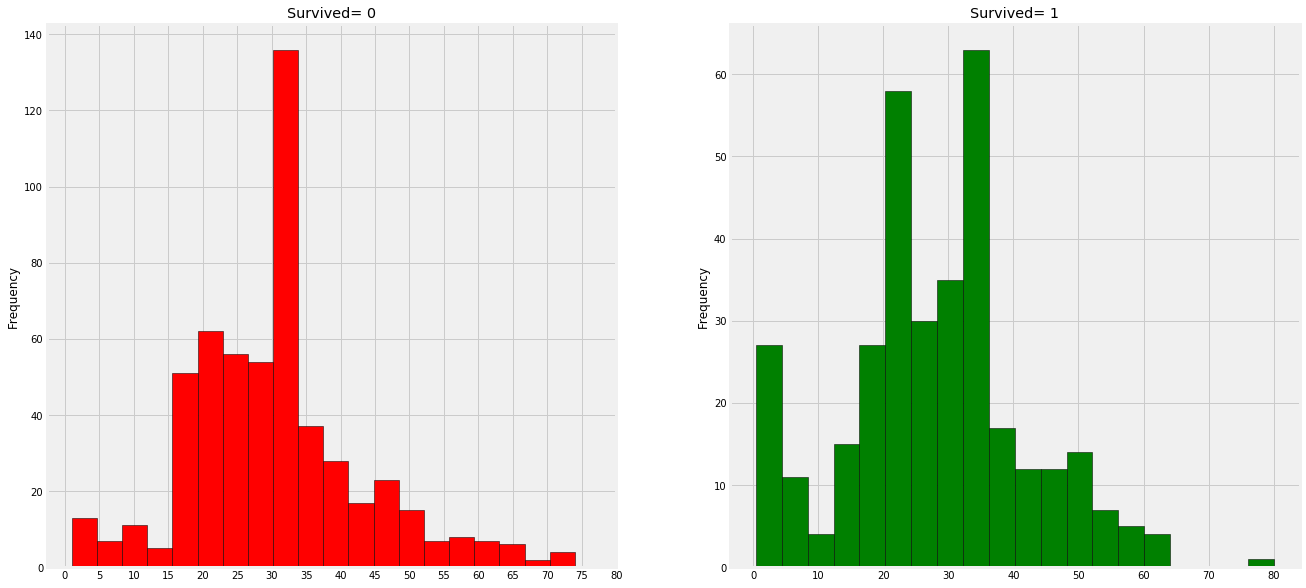

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
#x2=list(range(0,85,5))
#ax[1].set_xticks(x2)
plt.show()

观察:

1）幼儿（年龄在5岁以下）获救的还是蛮多的（妇女和儿童优先政策）。

2）最老的乘客得救了（80年）。

3）死亡人数最高的是30-40岁年龄组。

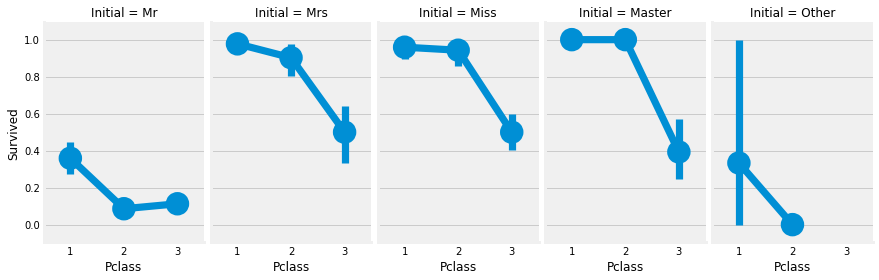

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
fig=plt.gcf()
fig.set_size_inches(12,4)
# 上面这两列用于调整sns的plot大小
plt.show()

 因此，无论性别如何，妇女和儿童第一政策都是正确的。

Embarked--> 登船地点

In [22]:
#Crosstab里面第一个list表示纵轴，第二个list表示横轴
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
#注：总和是889，因为有2个登船地点是确实值

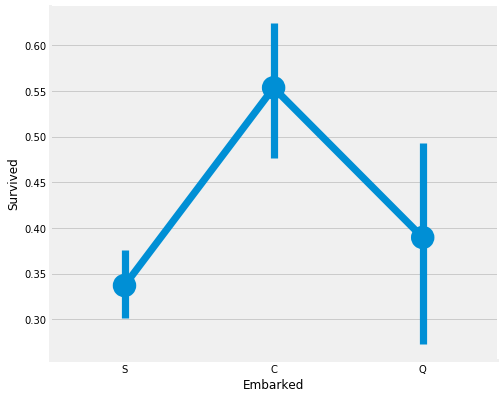

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C港生存的可能性最高在0.55左右，而S的生存率最低。

* sns.countplot()

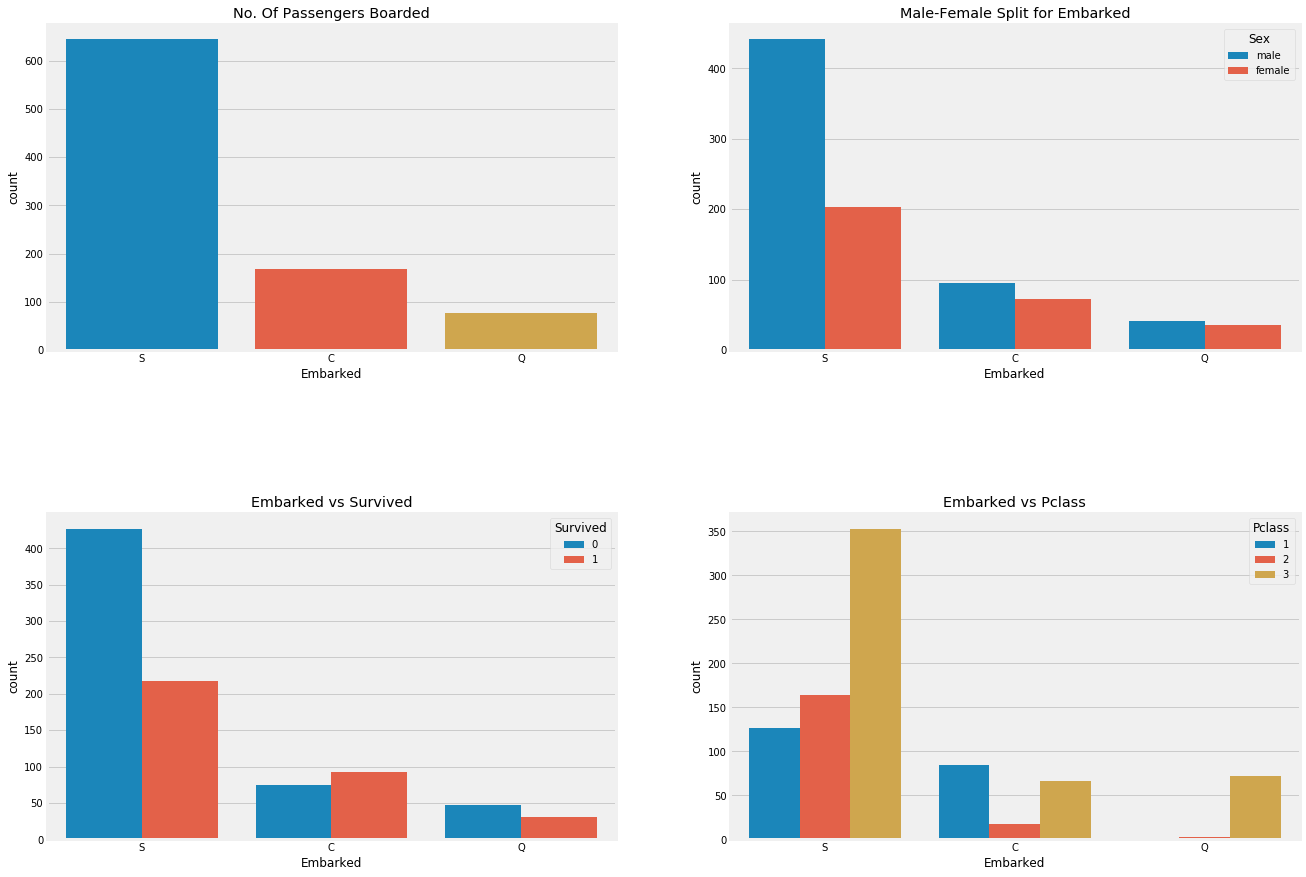

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5) #设置图与图之间的间距
plt.show()

观察:

1）大部分人的船舱等级是3。

2）C的乘客看起来很幸运，他们中的一部分幸存下来。

3）S港口的富人蛮多的。仍然生存的机会很低。

4）港口Q几乎有95%的乘客都是穷人。

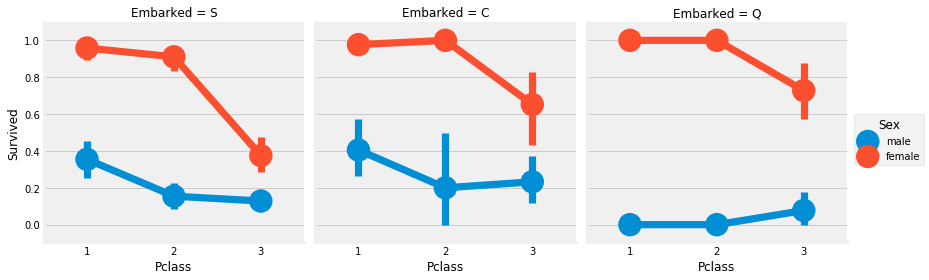

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

观察:

1）存活的几率几乎为1 在pclass1和pclass2中的女人。

2）pclass3 的乘客中男性和女性的生存率都是很偏低的。

3）端口Q很不幸，因为那里都是3等舱的乘客。


港口中也存在缺失值，在这里用众数来进行填充了，因为S登船人最多

In [26]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

sibsip -->兄弟姐妹的数量

这个特征表示一个人是独自一人还是与他的家人在一起。

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')
# pd.crosstab(data.SibSp,data.Survived).style.background_gradient(cmap='summer_r')

### 用两个更直观的图反应上面的这种情况

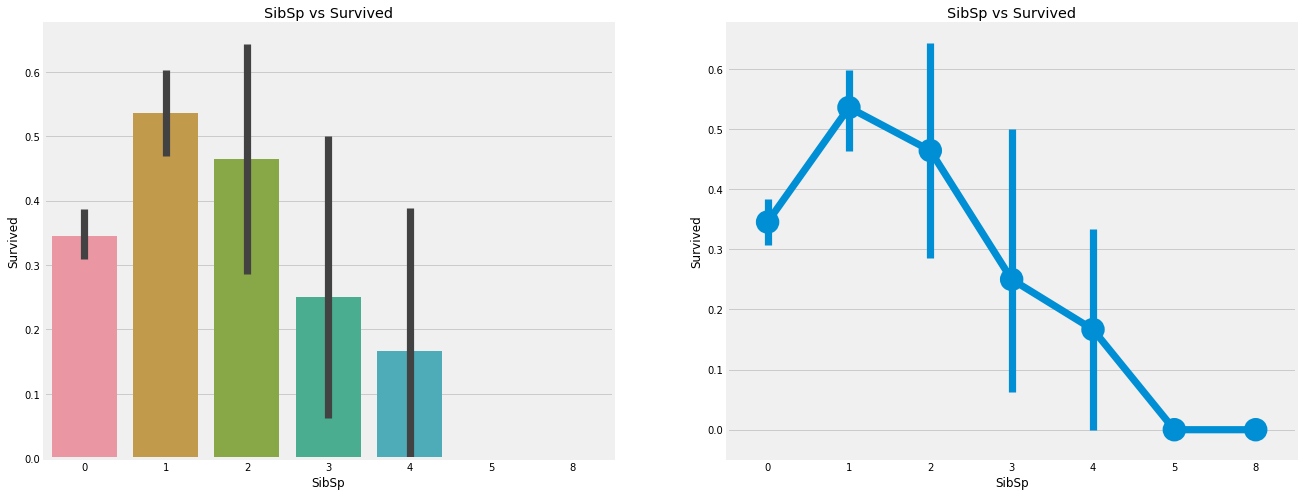

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)  # (close the current figure)若不加这一条则会多出一个空图
plt.show()

### 做出船舱等级与拥有兄弟姐妹数的乘客的crosstab

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

观察:

barplot和factorplot表明，如果乘客是孤独的船上没有兄弟姐妹，他有34.5%的存活率。如果兄弟姐妹的数量增加，该图大致减少。这是有道理的。也就是说，如果我有一个家庭在船上，我会尽力拯救他们，而不是先救自己。但是令人惊讶的是，5-8名成员家庭的存活率为0%。原因可能是他们在pclass=3的船舱？


Parch --> 父母和孩子的数量

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

再次表明，大家庭出现在pclass3。

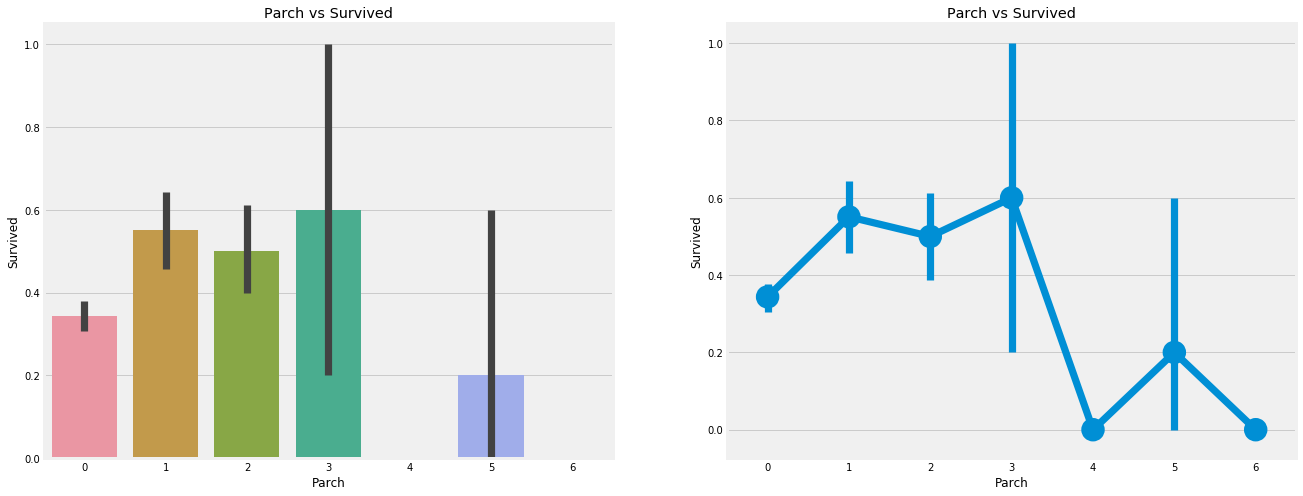

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

观察:

这里的结果也很相似。带着父母的乘客有更大的生存机会。然而，它随着数字的增加而减少。

在船上的家庭父母人数中有1-3个的人的生存机会是好的。独自一人也证明是致命的，当船上有4个父母时，生存的机会就会减少。

Fare--> 船票的价格

In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


平均船票价格为32.2，最低价格为0，最高价格为512.3

### 不同船舱等级价格的分布

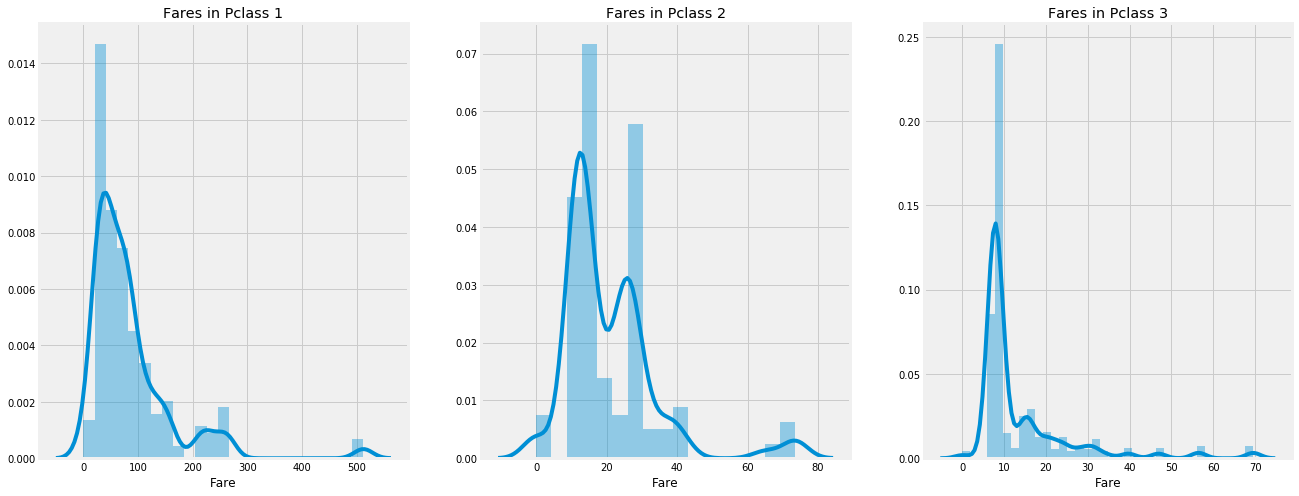

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

EDA：

性别：与男性相比，女性的生存机会很高。

Pclass：有，第一类乘客给你更好的生存机会的一个明显趋势。对于pclass3成活率很低。对于女性来说，从pclass1生存的机会几乎是。

年龄：小于5-10岁的儿童存活率高。年龄在15到35岁之间的乘客死亡很多。

港口：上来的仓位也有区别，死亡率也很大！

家庭：有1-2的兄弟姐妹、配偶或父母上1-3显示而不是独自一人或有一个大家庭旅行，有更大的概率存活。

### 展示特征之间的相关性

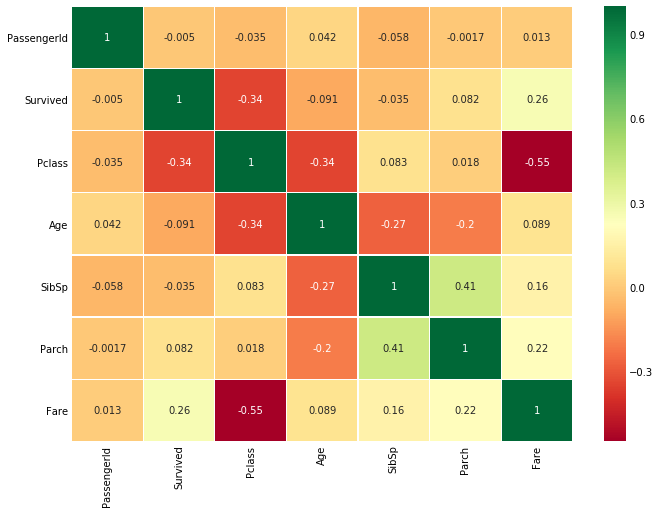

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
# cmap="YlGnBu"可以使得颜色更容易区分
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 特征相关性的热度图

首先要注意的是，只有数值特征进行比较

正相关：如果特征A的增加导致特征b的增加，那么它们呈正相关。值1表示完全正相关。

负相关：如果特征A的增加导致特征b的减少，则呈负相关。值-1表示完全负相关。

现在说两个特性是高度或完全相关的，所以一个增加导致另一个增加。这意味着两个特征都包含高度相似的信息，并且信息很少或没有变化。这样的特征是没有价值的！

那么应该同时使用它们吗？在制作或训练模型时，应该尽量减少冗余特性，因为它减少了训练时间和许多优点。

现在，从上面的图，可以看到，特征不显著相关。

### 特征工程和数据清洗


当得到一个具有特征的数据集时，是不是所有的特性都很重要？可能有许多冗余的特征应该被消除，还可以通过观察或从其他特征中提取信息来获得或添加新特性。


## 构建特征

### 年龄特征：

年龄是连续的特征，在机器学习模型中存在连续变量的问题。

如果说通过性别来组织或安排体育运动，可以很容易地把他们分成男女分开。

如果按他们的年龄分组，会怎么做？如果有30个人，可能有30个年龄值。

需要对连续值进行离散化来分组。

乘客的最大年龄是80岁。所以可以将范围从0-80成5箱。80/5＝16。

In [35]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked Initial  Age_band  
0      0         A/5 21171   7.2500   NaN        S      Mr         1  
1      0          PC 17599  71.2833   C85        C     Mrs         2  
2      0  STON/O2. 3101282   7.9250   NaN        S    Miss         1

In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passenegers in each band

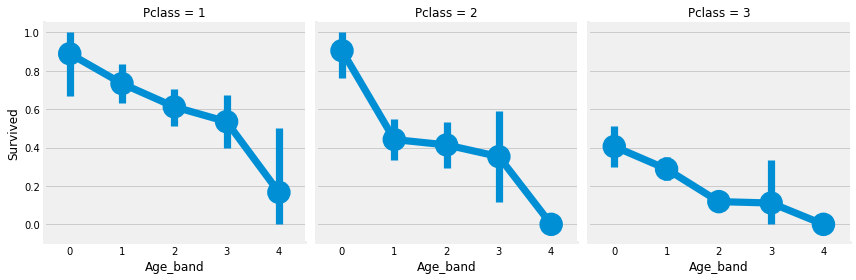

In [37]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

生存率随年龄的增加而减少，不论Pclass。

### Family_size：家庭总人数
光看兄弟姐妹和老人孩子不直接，直接看全家的人数

增加两个特征，一个是Family_Size，一个是Alone

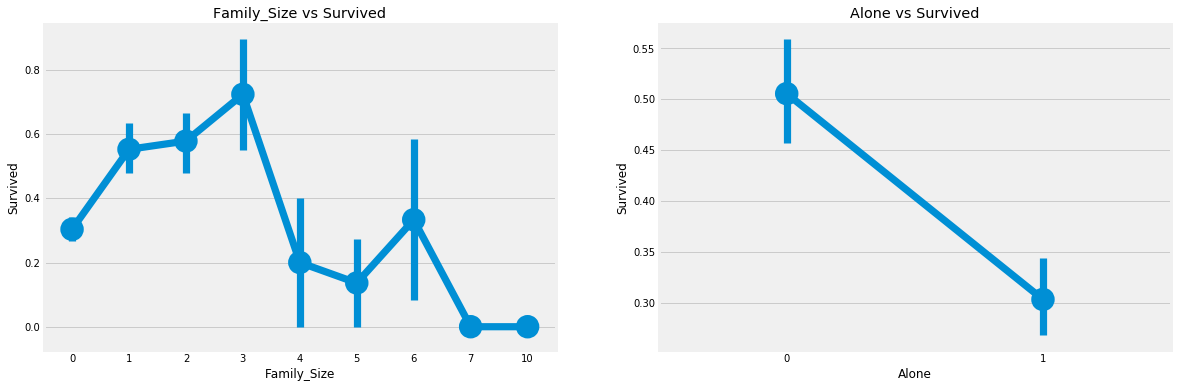

In [38]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size

data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

family_size = 0意味着passeneger是孤独的。显然，如果是单独或family_size = 0，那么生存的机会很低。家庭规模4以上，机会也减少。这看起来也是模型的一个重要特性。可以进一步研究这个问题。

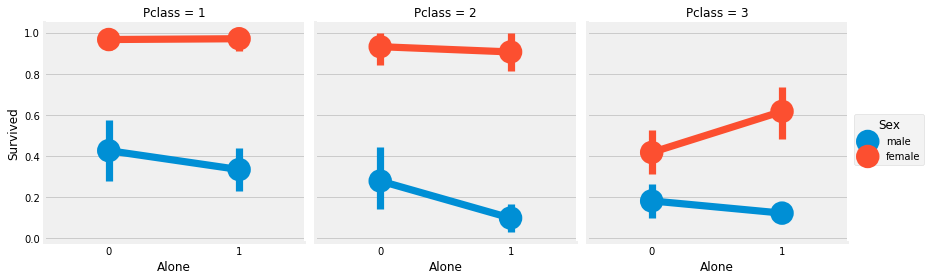

In [39]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### 船票价格
因为票价也是连续的特性，所以需要将它转换为数值。

* pandas.qcut

In [40]:
data['Fare_Range']=pd.qcut(data['Fare'],4) #将船票价格分为4个区间
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

如上所述，可以清楚地看到，船票价格增加生存的机会增加。

In [41]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

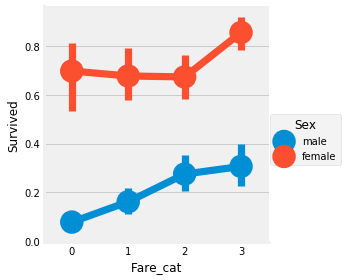

In [42]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

显然，随着fare_cat增加，存活的几率增加。随着性别的变化，这一特性可能成为建模过程中的一个重要特征。

将字符串值转换为数字，因为不能把字符串传入一个机器学习模型
* data[col_name].replace([,,,],[,,,],inplace = True)

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

去掉不必要的特征

名称——> 不需要name特性，因为它不能转换成任何分类值

年龄——>有age_band特征，所以不需要这个

票号——>这是任意的字符串，不能被归类

票价——>有fare_cat特征，所以不需要

船仓号——>这个也不要没啥含义

passengerid ——>不能被归类

* data.drop(['','',''],axis = 1,inplace = True)  #axis = 1 去掉列

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

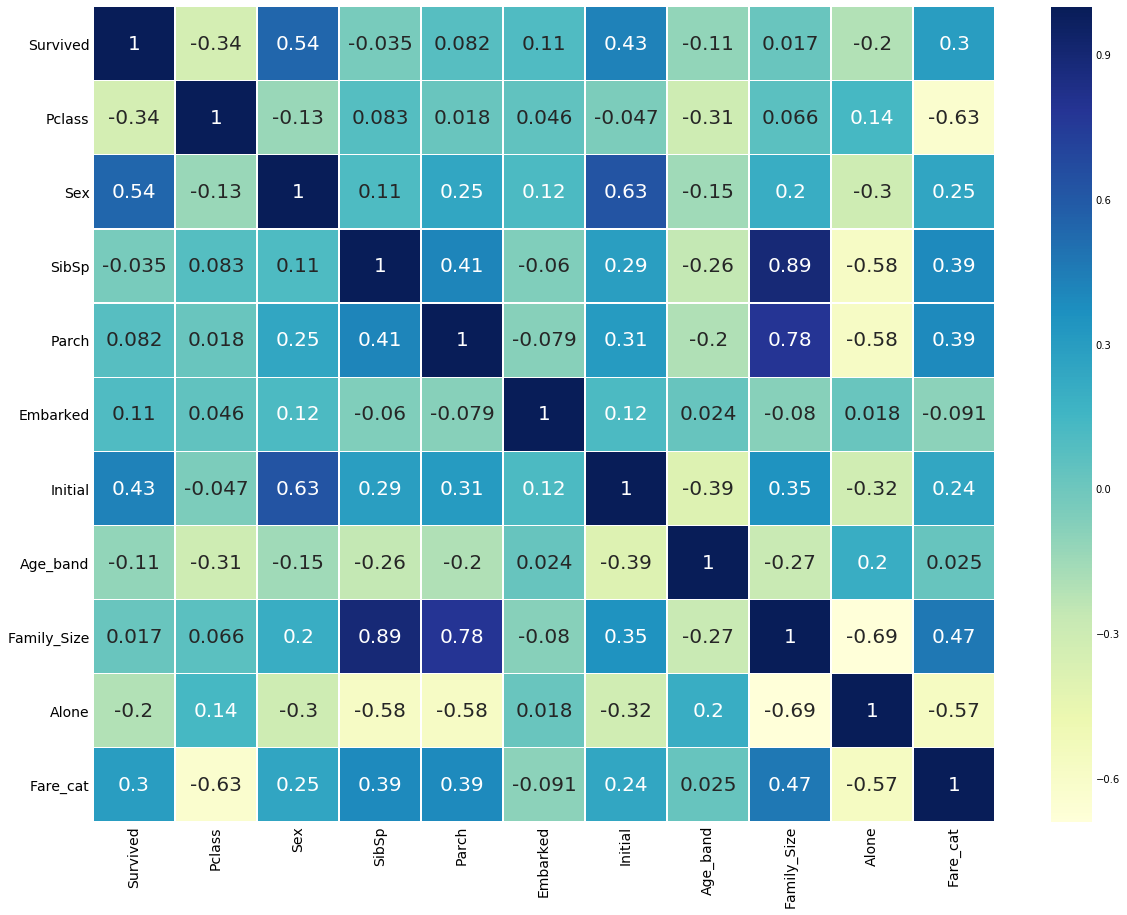

In [45]:
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

现在以上的相关图，可以看到一些正相关的特征

### 机器学习建模
已经从EDA部分获得了一些见解。但是，不能准确地预测或判断一个乘客是否会幸存或死亡。现在将使用一些很好的分类算法来预测乘客是否能生存下来：

1）logistic回归

2）支持向量机（线性和径向）

3）随机森林

4）k-近邻

5）朴素贝叶斯

6）决策树

7）神经网络

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
#stratify : array-like or None (default is None)
#           If not None, data is split in a stratified fashion, using this as the class labels.

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

# 插播一段用Karas构建的神经网络模型预测



In [55]:
tempx = np.array(train_X)
tempy = np.array(train_Y)
tempyy = np.array([[0,0] for i in range(623)])
for i in range(623):
    if tempy[i] == 0:
        tempyy[i] = [1,0]
    else:
        tempyy[i] = [0,1]
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(tempx, tempyy,
          epochs=1000,
          batch_size=623)

Epoch 1/1000
623/623 [==============================] - 0s 558us/step - loss: 0.7402 - acc: 0.4912
Epoch 2/1000
623/623 [==============================] - 0s 6us/step - loss: 0.7052 - acc: 0.5570
Epoch 3/1000
623/623 [==============================] - 0s 8us/step - loss: 0.6458 - acc: 0.6276
Epoch 4/1000
623/623 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6485
Epoch 5/1000
623/623 [==============================] - 0s 6us/step - loss: 0.6056 - acc: 0.6693
Epoch 6/1000
623/623 [==============================] - 0s 8us/step - loss: 0.5761 - acc: 0.6838
Epoch 7/1000
623/623 [==============================] - 0s 8us/step - loss: 0.5725 - acc: 0.7014
Epoch 8/1000
623/623 [==============================] - 0s 11us/step - loss: 0.5369 - acc: 0.7432
Epoch 9/1000
623/623 [==============================] - 0s 10us/step - loss: 0.5262 - acc: 0.7528
Epoch 10/1000
623/623 [==============================] - 0s 8us/step - loss: 0.5145 - acc: 0.7480
Epoch 11/1000
623/623 [=

Epoch 85/1000
623/623 [==============================] - 0s 5us/step - loss: 0.3907 - acc: 0.8315
Epoch 86/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3952 - acc: 0.8250
Epoch 87/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3941 - acc: 0.8347
Epoch 88/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3890 - acc: 0.8315
Epoch 89/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3906 - acc: 0.8299
Epoch 90/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3947 - acc: 0.8347
Epoch 91/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3790 - acc: 0.8331
Epoch 92/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3838 - acc: 0.8234
Epoch 93/1000
623/623 [==============================] - 0s 5us/step - loss: 0.3990 - acc: 0.8379
Epoch 94/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3858 - acc: 0.8379
Epoch 95/1000
623/62

Epoch 168/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3664 - acc: 0.8443
Epoch 169/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3608 - acc: 0.8379
Epoch 170/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3558 - acc: 0.8395
Epoch 171/1000
623/623 [==============================] - 0s 5us/step - loss: 0.3590 - acc: 0.8475
Epoch 172/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3553 - acc: 0.8443
Epoch 173/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3704 - acc: 0.8283
Epoch 174/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3548 - acc: 0.8427
Epoch 175/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3666 - acc: 0.8443
Epoch 176/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3500 - acc: 0.8459
Epoch 177/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3719 - acc: 0.8283
Epoch 178/

Epoch 251/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3292 - acc: 0.8491
Epoch 252/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3333 - acc: 0.8507
Epoch 253/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3399 - acc: 0.8459
Epoch 254/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3256 - acc: 0.8539
Epoch 255/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3491 - acc: 0.8507
Epoch 256/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3472 - acc: 0.8395
Epoch 257/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3217 - acc: 0.8507
Epoch 258/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3417 - acc: 0.8523
Epoch 259/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3254 - acc: 0.8555
Epoch 260/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3436 - acc: 0.8427
Epoch 261/

Epoch 334/1000
623/623 [==============================] - 0s 5us/step - loss: 0.3176 - acc: 0.8507
Epoch 335/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3232 - acc: 0.8459
Epoch 336/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3133 - acc: 0.8620
Epoch 337/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3007 - acc: 0.8668
Epoch 338/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3261 - acc: 0.8571
Epoch 339/1000
623/623 [==============================] - 0s 5us/step - loss: 0.3163 - acc: 0.8700
Epoch 340/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3126 - acc: 0.8620
Epoch 341/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3176 - acc: 0.8604
Epoch 342/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3391 - acc: 0.8507
Epoch 343/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3349 - acc: 0.8459
Epoch 344/

Epoch 417/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3066 - acc: 0.8812
Epoch 418/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2921 - acc: 0.8716
Epoch 419/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2833 - acc: 0.8812
Epoch 420/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3027 - acc: 0.8636
Epoch 421/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3030 - acc: 0.8796
Epoch 422/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3057 - acc: 0.8668
Epoch 423/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3041 - acc: 0.8636
Epoch 424/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3022 - acc: 0.8604
Epoch 425/1000
623/623 [==============================] - 0s 6us/step - loss: 0.3031 - acc: 0.8732
Epoch 426/1000
623/623 [==============================] - 0s 8us/step - loss: 0.3077 - acc: 0.8732
Epoch 427/

Epoch 500/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2860 - acc: 0.8844
Epoch 501/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2839 - acc: 0.8925
Epoch 502/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2824 - acc: 0.8876
Epoch 503/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2833 - acc: 0.8828
Epoch 504/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2893 - acc: 0.8860
Epoch 505/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2996 - acc: 0.8748
Epoch 506/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2932 - acc: 0.8780
Epoch 507/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2830 - acc: 0.8764
Epoch 508/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2711 - acc: 0.8876
Epoch 509/1000
623/623 [==============================] - 0s 5us/step - loss: 0.2853 - acc: 0.8812
Epoch 510/

Epoch 583/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2657 - acc: 0.8957
Epoch 584/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2845 - acc: 0.8812
Epoch 585/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2762 - acc: 0.8796
Epoch 586/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2718 - acc: 0.8796
Epoch 587/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2868 - acc: 0.8844
Epoch 588/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2711 - acc: 0.8909
Epoch 589/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2672 - acc: 0.8876
Epoch 590/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2791 - acc: 0.8668
Epoch 591/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2758 - acc: 0.8860
Epoch 592/1000
623/623 [==============================] - 0s 5us/step - loss: 0.2616 - acc: 0.8844
Epoch 593/

Epoch 666/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2712 - acc: 0.8876
Epoch 667/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2614 - acc: 0.8909
Epoch 668/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2557 - acc: 0.8844
Epoch 669/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2561 - acc: 0.8941
Epoch 670/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2678 - acc: 0.8828
Epoch 671/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2649 - acc: 0.8780
Epoch 672/1000
623/623 [==============================] - 0s 11us/step - loss: 0.2614 - acc: 0.8860
Epoch 673/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2695 - acc: 0.8844
Epoch 674/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2585 - acc: 0.8925
Epoch 675/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2542 - acc: 0.8860
Epoch 676

Epoch 749/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2553 - acc: 0.8892
Epoch 750/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2696 - acc: 0.8860
Epoch 751/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2543 - acc: 0.8892
Epoch 752/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2799 - acc: 0.8748
Epoch 753/1000
623/623 [==============================] - 0s 10us/step - loss: 0.2726 - acc: 0.8844
Epoch 754/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2626 - acc: 0.8860
Epoch 755/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2575 - acc: 0.8844
Epoch 756/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2628 - acc: 0.8844
Epoch 757/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2496 - acc: 0.8925
Epoch 758/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2549 - acc: 0.8828
Epoch 759

Epoch 832/1000
623/623 [==============================] - 0s 10us/step - loss: 0.2489 - acc: 0.8860
Epoch 833/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2599 - acc: 0.8860
Epoch 834/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2687 - acc: 0.8860
Epoch 835/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2614 - acc: 0.8844
Epoch 836/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2568 - acc: 0.8925
Epoch 837/1000
623/623 [==============================] - 0s 10us/step - loss: 0.2608 - acc: 0.8844
Epoch 838/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2649 - acc: 0.8925
Epoch 839/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2524 - acc: 0.8876
Epoch 840/1000
623/623 [==============================] - 0s 5us/step - loss: 0.2511 - acc: 0.8989
Epoch 841/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2495 - acc: 0.8925
Epoch 84

Epoch 915/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2655 - acc: 0.8941
Epoch 916/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2505 - acc: 0.8909
Epoch 917/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2540 - acc: 0.8796
Epoch 918/1000
623/623 [==============================] - 0s 10us/step - loss: 0.2456 - acc: 0.9037
Epoch 919/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2560 - acc: 0.8828
Epoch 920/1000
623/623 [==============================] - 0s 5us/step - loss: 0.2436 - acc: 0.8941
Epoch 921/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2590 - acc: 0.8973
Epoch 922/1000
623/623 [==============================] - 0s 8us/step - loss: 0.2408 - acc: 0.8957
Epoch 923/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2515 - acc: 0.8909
Epoch 924/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2392 - acc: 0.8973
Epoch 925

Epoch 998/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2452 - acc: 0.8909
Epoch 999/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2463 - acc: 0.8909
Epoch 1000/1000
623/623 [==============================] - 0s 6us/step - loss: 0.2508 - acc: 0.8909


# 插播完成

### Radial Support Vector Machines(rbf-SVM)

In [50]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [51]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


### Decision Tree

In [71]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [72]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


现在的精度为KNN模型的变化，改变n_neighbours值属性。默认值是5。检查精度在n_neighbours不同时的结果。

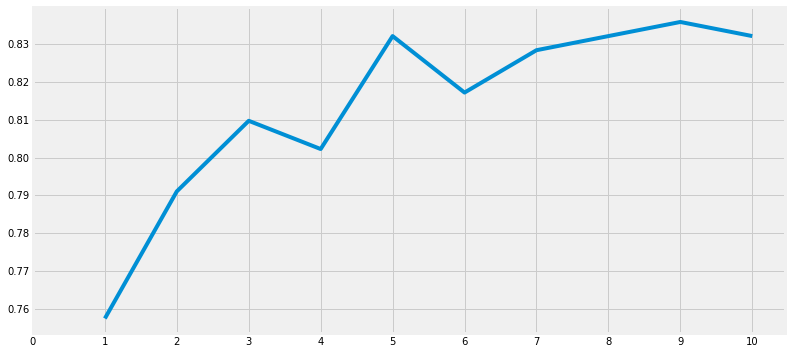

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [73]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### 贝叶斯

In [77]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### 随机森林

In [78]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


模型的精度并不是决定分类器效果的唯一因素。假设分类器在训练数据上进行训练，需要在测试集上进行测试才有效果

现在这个分类器的精确度很高，但是可以确认所有的新测试集都是90%吗？答案是否定的，因为不能确定分类器在不同数据源上的结果。当训练和测试数据发生变化时，精确度也会改变。它可能会增加或减少。

为了克服这一点，得到一个广义模型，使用交叉验证。

### 交叉验证

一个测试集不太够，多轮求均值是一个好的策略！

1）的交叉验证的工作原理是首先将数据集分成k-subsets。

2）假设将数据集划分为（k＝5）部分。预留1个部分进行测试，并对这4个部分进行训练。

3）通过在每次迭代中改变测试部分并在其他部分中训练算法来继续这个过程。然后对衡量结果求平均值，得到算法的平均精度。

In [79]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm           0.793471  0.047797
Radial Svm           0.828290  0.034427
Logistic Regression  0.805843  0.021861
KNN                  0.813783  0.041210
Decision Tree        0.803633  0.029065
Naive Bayes          0.801386  0.028999
Random Forest        0.818202  0.032742

In [81]:
accuracy

[array([0.81111111, 0.83146067, 0.75280899, 0.87640449, 0.7752809 ,
        0.80898876, 0.74157303, 0.73033708, 0.85393258, 0.75280899]),
 array([0.82222222, 0.87640449, 0.78651685, 0.87640449, 0.80898876,
        0.82022472, 0.79775281, 0.78651685, 0.87640449, 0.83146067]),
 array([0.8       , 0.82022472, 0.7752809 , 0.83146067, 0.79775281,
        0.78651685, 0.79775281, 0.79775281, 0.85393258, 0.79775281]),
 array([0.73333333, 0.87640449, 0.7752809 , 0.83146067, 0.83146067,
        0.83146067, 0.80898876, 0.7752809 , 0.86516854, 0.80898876]),
 array([0.76666667, 0.83146067, 0.7752809 , 0.83146067, 0.80898876,
        0.76404494, 0.80898876, 0.7752809 , 0.84269663, 0.83146067]),
 array([0.76666667, 0.76404494, 0.78651685, 0.83146067, 0.7752809 ,
        0.83146067, 0.82022472, 0.7752809 , 0.84269663, 0.82022472]),
 array([0.8       , 0.84269663, 0.76404494, 0.82022472, 0.84269663,
        0.79775281, 0.82022472, 0.7752809 , 0.87640449, 0.84269663])]

用盒图直观展现交叉验证中的accuracy的分布

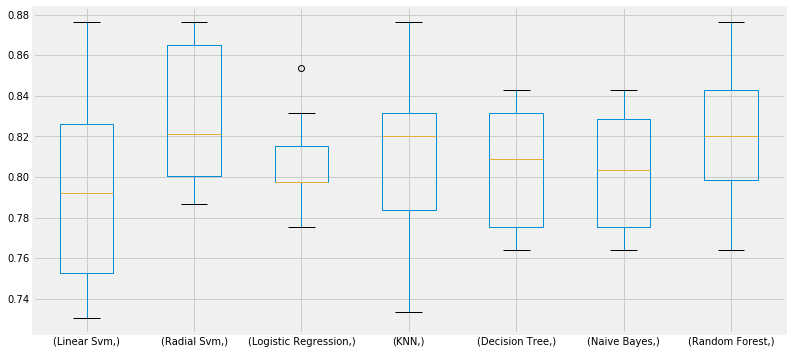

In [82]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

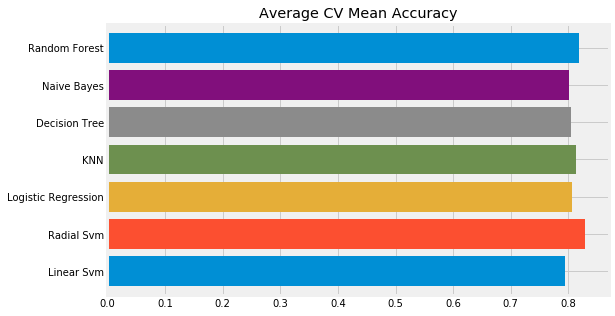

In [83]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### 混淆矩阵 它给出分类器的正确和不正确分类的数量。
* confusion_matrix(Y,y_pred)
#### 只需要给出预测值和真实值

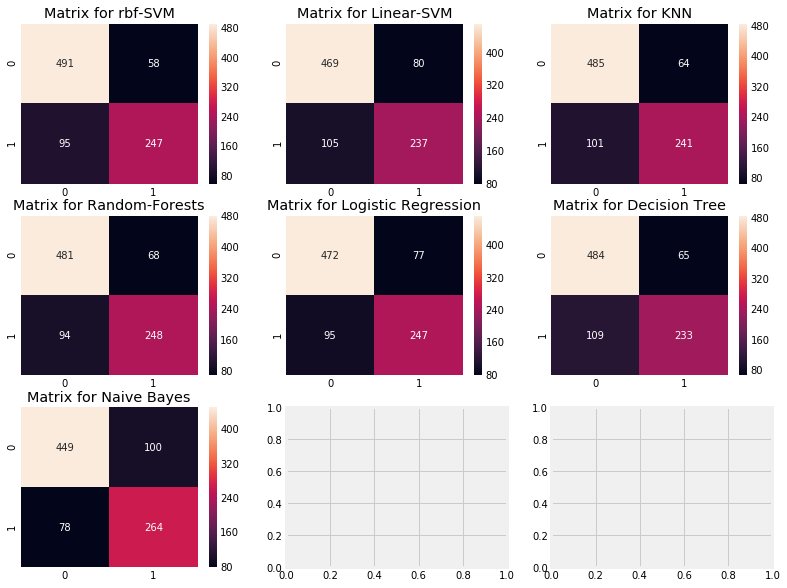

In [84]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

解释混淆矩阵：第一个图

1）预测的正确率为491（死亡）+ 247（存活），平均CV准确率为（491+247）/ 891＝82.8%。

2）58和95都是错的。

### 超参数整定

* from sklearn.model_selection import GridSearchCV

机器学习模型就像一个黑盒子。这个黑盒有一些默认参数值，我们可以调整或更改以获得更好的模型。比如支持向量机模型中的C和γ，我们称之为超参数，他们对结果可能产生非常大的影响。

* GridSearchCV(estimator=,param_grid=,verbose=True)

In [88]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}  #一定是字典的形式
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print('\n')
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8282828282828283


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    8.4s finished


### Random Forests

In [89]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   17.4s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


RBF支持向量机的最佳得分为82.82%，C＝0.5，γ＝0.1。RandomForest，成绩是81.8% 

### 集成
集成是提高模型的精度和性能的一个很好的方式。简单地说，是各种简单模型的结合创造了一个强大的模型。

1）随机森林类型的，并行的集成

2）提升类型

3）堆叠类型

投票分类器是将许多不同的简单机器学习模型的预测结合起来的最简单方法。它给出了一个平均预测结果基于各子模型的预测。
* from sklearn.ensemble import VotingClassifier

In [92]:
import warnings
warnings.filterwarnings('ignore')  #过滤警告
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237660310974917


### Bagged KNN

In [93]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


### Bagged DecisionTree

In [94]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


提升是一个逐步增强的弱模型：

首先对完整的数据集进行训练。现在模型会得到一些实例，而有些错误。现在，在下一次迭代中，学习者将更多地关注错误预测的实例或赋予它更多的权重

AdaBoost（自适应增强）
在这种情况下，弱学习或估计是一个决策树。但可以改变缺省base_estimator任何算法的选择。

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


为了得到高精度的AdaBoost。尝试用超参数调整来增加它。

In [100]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True,n_jobs=8)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   28.6s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   52.0s finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


可以看出AdaBoost的最高精度是83.16%，此时的参数是n_estimators = 200和learning_rate = 0.05

Confusion Matrix for the Best Model

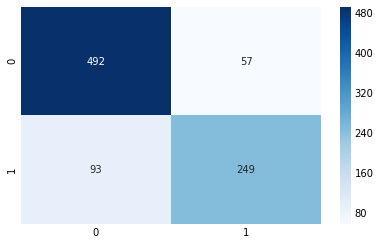

In [103]:
import matplotlib
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap=matplotlib.cm.Blues,annot=True,fmt='2.0f')
plt.show()

### Feature Importance

显示在模型中不同特征的重要性

* model.feature_importances_

In [107]:
import xgboost as xg

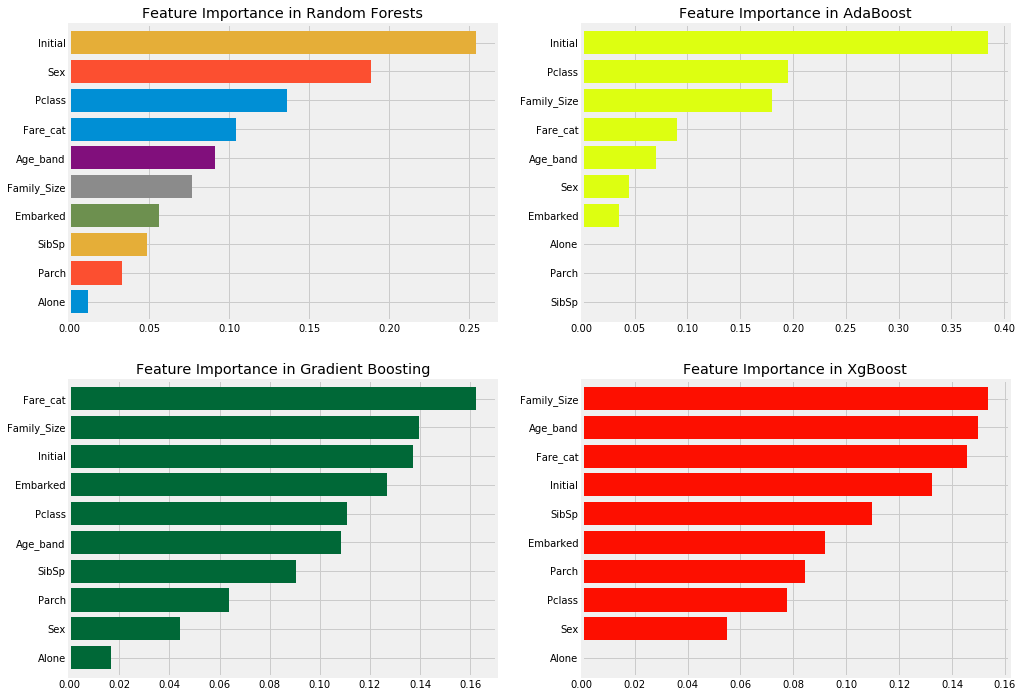

In [112]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index = X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index = X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index = X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,index = X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

### 特征标准化示例

In [121]:
from sklearn import preprocessing

tempX = X.copy()
std_scale = preprocessing.StandardScaler().fit(tempX[['Pclass','Family_Size']])
df_std = std_scale.transform(tempX[['Pclass','Family_Size']])
df_std

array([[ 0.82737724,  0.05915988],
       [-1.56610693,  0.05915988],
       [ 0.82737724, -0.56097483],
       ...,
       [ 0.82737724,  1.29942929],
       [-1.56610693, -0.56097483],
       [ 0.82737724, -0.56097483]])

In [122]:
std_scale = preprocessing.MinMaxScaler().fit(tempX[['Pclass','Family_Size']])
df_minmax = std_scale.transform(tempX[['Pclass','Family_Size']])
df_minmax

array([[1. , 0.1],
       [0. , 0.1],
       [1. , 0. ],
       ...,
       [1. , 0.3],
       [0. , 0. ],
       [1. , 0. ]])